# CS541: Applied Machine Learning, Spring 2025, Problem Set 4

Problem set 4 is due in Gradescope on **April 10, Thursday at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **100 points** (**80 pts** coding, and **20 pts** short answer).  There is a bonus question at the end which is worth an extra 10 pts but your maximum final score will be capped at 100 if you scored beyond 100. Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps4.py** and a pdf file named **ps4.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

**THE SUBMISSION IS DUE BY April 10, Thursday at 11:59pm. **

There will be three separate submission links for the assignment:
1. Submit **ps3.py** to `PS4-Code`
2. Submit **ONLY your typed code** to `PS4-Typed Code`.
  + The .py file should contain **ONLY your typed code** (Do not include any other code apart from what you coded for the assignment).
  + The .py should not contain any written answers. Only the code you wrote.
  + If your typed code falls under a function definition thats predefined by us, **ONLY include your typed code** and nothing else.
  + For each cell block within colab/jupyter that you typed your ocde in, Add 2 new lines ("\n") before pasting your typed code in the .py file.
  + Please name the .py file your actual name.

3. Submit a single `.pdf` report that contains your work for all written questions to `PS4`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. **You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). Failure to follow these instructions will result in a loss of points.**

**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.


**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.


**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

In [2]:
## import some libraries
import sklearn
from sklearn import datasets
import numpy as np
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from sklearn import tree
from tqdm import tqdm
import torch
from torch import Tensor
import numpy as np
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import display,Image
import random


# **Question 1.** Markov Decision Process (*5 total points*)
The Markov property states that the future depends only on the present and not on the past. The Markov chain is the probabilistic model that solely depends on the current state to predict the next state. In this section, we will join a dice game to determine a MDP.

## **1.1 Short answer:** Dice game *(5 pts)*

Assume you are in Las Vegas, sitting on a playing slot machines for dice game.

For each round r = 1, 2, . . .  you choose **stay** or **quit**.

   • If **quit**, you get $10 and we end the game.

   • If **stay**, you get $4 and then roll a 6-sided dice.

       – If the dice results in 1 or 2, we end the game.

       – Otherwise, continue to the next round.
       
**Question:** Define states, actions, and determine the transition probabilities T(state, action, new_state) for the game.


Write your answer in this block

**Answer:**

States:	
* s: A general “playing” state. 
* end: The terminal state (game over).

Actions:
* stay: Continue playing the game.
* quit: End the game.

Transition probabilities:
* T(s, quit, end) = 1
* T(s, stay, s) = 1/3 (Roll dice and get 1 or 2)
* T(s, stay, end) = 2/3 (Roll dice and get 3, 4, 5, or 6)

# **Question 2.1.** Hidden Markov Models (HMMs) (*2.5 total points*)

Here is a nice brief tutorial on HMMs: https://web.stanford.edu/~jurafsky/slp3/A.pdf .

Given a 3x3 grid shown in the figure below

![alt text](https://github.com/arijitray1993/arijitray1993.github.io/blob/main/images/HMM_question.png?raw=true?refresh)

An agent is taking actions to reach the goal and gets a score at the end based on the path it took. For example, If it went up, up, left, left -> it will get a score of -1 + 10 = 9.

The white blocks have 0 score. The traffic can have -1 or -2. Hitting the wall from a certain block keeps you in the same block, but you get -2. The terminal goal block has +10.

The actions an agent can take is `{'Up', 'Right'}`

At each block, an agent decides to take an action determined by the probabilities in the arrows.
In each case, the "intended" action outcome occurs with probability 0.8, and the other action happens with 0.2 probability.


## Given that an agent took some actions (hidden variable), and got a final score of 7. What is the probability that the actions involved hitting a wall along the way?



Write your answer in this block.

**Answer:**
There are 2 possible paths of getting a final score of 7. The first path: up (-1), right(hit the wall -2), up, right, right (+10). The probabilty of having actions on first path is (0.4*0.8+0.6*0.2)*(0.5*0.8+0.5*0.2)*(0.5*0.8+0.5*0.2)*(0.8*0.8+0.2*0.2)*(0.9*0.8+0.1*0.2)=0.055352. The second path: right, right (-1), up (-2), up (+10). The probabiliy of second path is (0.6*0.8+0.4*0.2)*(0.7*0.8+0.3*0.2)*(0.9*0.8+0.1*0.2)*(0.9*0.8+0.1*0.2)=0.19012672. So the probability of actions invovled hitting a wall is First Path Probability / (First Path Probability + Second Path Probability) = 0.2254859403

# **Question 2.2.** Hidden Markov Models (HMMs) (*2.5 total points*)

Based on the below diagram, Should the person move right or not ? Justify your answer elaborately.


In [6]:
#Image("./Decision.jpg")

Write your answer in this block.

**Answer:**
Based on the given probabilities, if the person takes the action Right, there is a 90% chance of ending up in a harmful state and only a 10% chance of reaching the goal.
Assuming the goal gives a high reward and the harmful state gives a strong penalty, the expected reward is negative. Mathematically:
E_Reward = 0.1 x (+10) + 0.9 x (-10) = -8
Since not moving results in an expected reward of 0, it is better not to move right.

# **Question 3.** Text Denoising using HMM (*45 total points*)


In this question we will correct text errors using a hidden Markov model. To obtain text we can obtain copyright-free book in plain characters from Project Gutenberg. For this question we will be looking at Saddle room songs and hunting ballads by Frederick C. Palmer. You can download the txt version at https://www.gutenberg.org/cache/epub/74589/pg74589.txt

## **3.1 Code:**  Preprocess Text *(5 pts)*
Let us now preprocess the text by dropping all punctuation marks except for spaces, convert all capital
letters to lower case, and mapping multiple spaces to a single space.
The preprocessed text will have 27 symbols (26 lower case letters and the space character).

In [3]:
import requests
import re

# Function to download and save the file
def download_file(url, local_filename):
    response = requests.get(url)
    response.raise_for_status()  # Ensure the download was successful
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    return local_filename

def question_3_1(file_path: str) -> str:
    '''
    - file_path: path to the txt file downloaded from the URL
    Returns:
    - simplified_text: contains only lowercase letters and single spaces.
    '''
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Write your code in this block ----------------
    simplified_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    simplified_text = re.sub(r'\s+', ' ', simplified_text)

    # End of your code ---------------------------

    return simplified_text

url = "https://www.gutenberg.org/cache/epub/74589/pg74589.txt"
file_path = "pg74589.txt"

# Download the file and save it locally
download_file(url, file_path)

# Process the downloaded file
cleaned_text = question_3_1(file_path)
print(cleaned_text[:200])


the project gutenberg ebook of saddle room songs and hunting ballads this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no r


## **3.2 Code:**  Letter Frequencies *(2 pts)*
Based on the given text, count unigram, bigram, and trigram letter frequencies.

In [4]:
from collections import Counter

def question_3_2(text: str, n: int) -> Counter:
    '''
    - text: str, the input text to process
    - n: int, the length of the n-grams to count

    Returns:
    - Counter: a Counter object where keys are n-grams and values are their respective counts
    '''

    # Write your code in this block ----------------
    grams = []
    for i in range(len(text) - n + 1):
        gram = text[i:i+n]
        grams.append(gram)
    # End of your code ---------------------------
    return Counter(grams)

unigram_counts = question_3_2(cleaned_text, 1)
unigrams = list(unigram_counts.items())[:10]
print(unigrams)



[('t', 2969), ('h', 1611), ('e', 3842), (' ', 7092), ('p', 652), ('r', 2197), ('o', 2617), ('j', 116), ('c', 912), ('g', 824)]


## **3.3 Code:**  Building n-gram Models *(5 pts)*
Use the counts from question 3.2 build models of unigram, bigram, and trigram letter
probabilities.

In [5]:
def question_3_3(ngram_counts: dict,  vocab_size: int) -> dict:
    '''
    - ngram_counts: dict, a dictionary containing n-gram counts
    - total_ngrams: int, the total number of n-grams in the text
    - vocab_size: int, the size of the vocabulary (unique n-grams)

    Returns:
    - ngram_probs: dict, a dictionary with n-grams as keys and their smoothed probabilities as values
    '''

    # Write your code in this block ----------------
    ngram_probs = {}
    total_ngrams = sum(ngram_counts.values())
    for ngram, count in ngram_counts.items():
        ngram_probs[ngram] = (count + 1) / (total_ngrams + vocab_size)

    # End of your code ---------------------------
    return ngram_probs

vocab_size=27
unigram_probs = question_3_3(unigram_counts,  vocab_size)
print("Unigram probabilities:", list(unigram_probs.items())[:10])


Unigram probabilities: [('t', 0.07690315898498187), ('h', 0.04174003107198343), ('e', 0.0995080269290523), (' ', 0.1836613153806318), ('p', 0.016908337648886586), ('r', 0.0569135163127913), ('o', 0.06778871051268773), ('j', 0.0030295183842568617), ('c', 0.023640600725012947), ('g', 0.02136198860693941)]


## **3.4 Code:**  Corrupt Input Text *(5 pts)*
Now let us corrupt the input text through the following process: with probability $P_c$ we will replace a character with a randomly selected character,else we will keep the original character with probability $1-P_c$.

In [6]:
import random
import string
def question_3_4(text: str, pc: float, vocab: list, seed: int) -> str:
    '''
    Arguments:
    - text: str, the input text to be corrupted
    - pc: float, the probability of replacing each character
    - vocab: list, the vocabulary of characters to choose from when replacing text

    Returns:
    - corrupted_text:the corrupted version of the input text
    '''

    # Write your code in this block ----------------

    # Set the random seed for reproducibility
    random.seed(seed)
    
    corrupted_chars = []
    
    for c in text:
        if random.random() < pc:
            corrupted_chars.append(random.choice(vocab))
        else:
            corrupted_chars.append(c)
    
    corrupted_text = ''.join(corrupted_chars)

    return corrupted_text

    # End of your code ---------------------------

vocab = list(string.ascii_lowercase + ' ')
seed=42
pc=0.1
original_text = "this is just an example"
corrupted_text = question_3_4(original_text, pc, vocab,seed)
print("Original text:", original_text)
print("Corrupted text:", corrupted_text)

Original text: this is just an example
Corrupted text: tiis is cusg an example


## **3.5 Code:**  Building transition matrix for HMM *(5 pts)*
Now you will build a transition matrix for a Hidden Markov Model (HMM), which is used to model the probabilities of transitioning from one character to another in a sequence of text. This matrix is essential for recovering sequence of true characters given some corrupted or noisy observations.

In [7]:
import numpy as np
def question3_5(bigram_counts: dict, vocab: list) -> np.ndarray:
    '''
    Arguments:
    - bigram_counts: dict, a dictionary where keys are bigrams and values are the counts of those bigrams
    - vocab:a list of all possible characters

    Returns:
    - transition_matrix: shape (vocab_size, vocab_size) where each entry represents the
                          probability of transitioning from one character to another
    '''

    # Write your code in this block ----------------
    # Initialize transition matrix
    vocab_size = len(vocab)
    transition_matrix = np.zeros((vocab_size, vocab_size))
    char_index_map = {char: idx for idx, char in enumerate(vocab)}

    # Calculate total bigram counts for each character
    row_sum = np.zeros(vocab_size)

    # Fill transition matrix with bigram probabilities
    for bigram, count in bigram_counts.items():
        char1, char2 = bigram[0], bigram[1]
        row = char_index_map[char1]
        col = char_index_map[char2]

        transition_matrix[row, col] += count
        row_sum[row] += count

    for i in range(vocab_size):
        if row_sum[i] > 0:
            transition_matrix[i, :] /= row_sum[i]

    # End of your code ---------------------------
    return transition_matrix




vocab = list(string.ascii_lowercase + ' ')
bigram_counts = question_3_2(cleaned_text, 2)
transition_matrix = question3_5(bigram_counts, vocab)
print(transition_matrix[0])


[0.         0.01637331 0.04379861 0.0462546  0.00081867 0.001228
 0.02947196 0.         0.03029063 0.         0.01309865 0.07081457
 0.01801064 0.20016373 0.         0.01760131 0.         0.10601719
 0.1011052  0.13180516 0.01023332 0.01882931 0.01637331 0.00327466
 0.04216128 0.00163733 0.08063856]



## **3.6 Code:**  Building emission matrix for HMM *(5 pts)*
We now need to build an emission matrix for a Hidden Markov Model (HMM). The emission matrix represents the probability of observing a certain character given the true underlying (hidden) character in a sequence of text.

The diagonal of the matrix should represent the probability that a character remains unchanged. The off-diagonal entries will represent the probability that a character is corrupted into another character.

In [8]:
def question3_6(vocab_size: int, corruption_prob: float) -> np.ndarray:
    '''
    Arguments:
    - vocab_size: int, the number of characters in the vocabulary
    - corruption_prob: float, the probability of a character being corrupted

    Returns:
    - emission_matrix: shape (vocab_size, vocab_size) where each entry represents the probability of observing one character given the hidden character
    '''

    # Write your code in this block ----------------
    emission_matrix = np.zeros((vocab_size, vocab_size))
    for i in range(vocab_size):
        for j in range(vocab_size):
            if i == j:
                emission_matrix[i, j] = 1 - corruption_prob
            else:
                emission_matrix[i, j] = corruption_prob / (vocab_size - 1)

    # End of your code ---------------------------
    return emission_matrix
pc=0.1
emission_matrix = question3_6(len(vocab), pc)
print(emission_matrix[0])

[0.9        0.00384615 0.00384615 0.00384615 0.00384615 0.00384615
 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615
 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615
 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615 0.00384615
 0.00384615 0.00384615 0.00384615]


## **3.7 Code:**  Converting Text to Indices Based on Vocabulary *(2 pts)*
Write a function that takes a string of text and a vocabulary list. The function should convert each character in the input text into its corresponding index in the vocabulary list.

In [9]:
def question3_7(text: str, vocab: list) -> list:
    '''
    Arguments:
    - text: str, the input text to be converted into indices
    - vocab: list, the list of characters in the vocabulary

    Returns:
    - indices: a list of integers where each integer is the index of the corresponding character in the vocabulary
    '''

    # Write your code in this block ----------------
    results = []
    char_index_map = {char: idx for idx, char in enumerate(vocab)}
    for char in text:
        results.append(char_index_map[char])

    # End of your code ---------------------------
    return results

## **3.8 Code:**  Converting Indices to Text Based on Vocabulary *(2 pts)*


Write a function that takes a list of indices and converts them back into a string using the provided vocabulary. Each index in the list corresponds to a character in the vocabulary.

In [10]:
def question3_8(indices: list, vocab: list) -> str:
    '''
    Arguments:
    - indices: list of integers, where each integer is an index in the vocabulary
    - vocab: list of characters in the vocabulary

    Returns:
    - A string where each character corresponds to the index from the vocabulary
    '''

    # Write your code in this block ----------------
    result = ""
    index_char_map = {idx: char for idx, char in enumerate(vocab)}
    for index in indices:
        result += index_char_map[index]

    # End of your code ----------------------------

    return result

## **3.9 Code:**  One-Hot Encoding Observations for HMM  *(2 pts)*
write a function that takes a list of indices and the size of the vocabulary, and returns a one-hot encoded matrix.


In [11]:
import numpy as np

def question3_9(indices: list, vocab_size: int) -> np.ndarray:
    '''

    - indices: list of integers, where each integer is an index in the vocabulary
    - vocab_size: the size of the vocabulary

    Returns:
    - A 2D numpy array representing one-hot encoded vectors with shape (len(indices), vocab_size)
    '''

    # Write your code in this block ----------------
    one_hot_encoded = np.zeros((len(indices), vocab_size))
    for i, index in enumerate(indices):
        one_hot_encoded[i, index] = 1

    # End of your code ----------------------------

    return one_hot_encoded


## **3.10 Code:**  Training HMM *(5 pts)*
In this question we will train a Hidden Markov Model (HMM) using bigram counts from a given text to decode the corrupted text.

We will use hmmlearn library’s **MultinomialHMM** class to create the model.

In [12]:
!pip install hmmlearn

In [13]:
from hmmlearn import hmm
def question3_10(original_text: str,bigram_counts:dict, vocab: list, pc: float) -> hmm.MultinomialHMM:
    '''
    Arguments:
    - original_text: str, the original text from which to train the HMM
    - vocab: list, the list of characters in the vocabulary
    - pc: float, the probability of character corruption (used for the emission matrix)

    Returns:
    - model: hmm.MultinomialHMM, the trained Hidden Markov Model
    '''

    # Write your code in this block ----------------

    # build the transion matrix and emission matrix. You can use question3_5 and question3_6
    transition_matrix = question3_5(bigram_counts, vocab)
    emission_matrix = question3_6(len(vocab), pc)


    # Initialize the HMM model using  hmm.MultinomialHMM and set n_trials to 1
    # Initialize with with uniform start probability
    startprob = np.full(len(vocab), 1/len(vocab))
    model = hmm.MultinomialHMM(n_components=len(vocab))
    model.n_trials = 1
    model.startprob_ = startprob
    model.transmat_ = transition_matrix
    model.emissionprob_ = emission_matrix

    # End of your code ---------------------------
    return model

original_text=cleaned_text
corrupted_text =question_3_4(original_text, 0.01, vocab,42)
bigram_counts = question_3_2(original_text, 2)
model = question3_10(original_text,bigram_counts, vocab, 0.01)

# Convert corrupted text to indices and one-hot encode it
corrupted_indices = question3_7(corrupted_text, vocab)
one_hot_corrupted = question3_9(corrupted_indices, len(vocab))

# Decode the corrupted text
_, recovered_indices = model.decode(one_hot_corrupted)
recovered_text = question3_8(recovered_indices, vocab)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


## **3.11 Code:** Estimating Error Rate Using Hamming Distance *(2 pts)*
We will estimate the error rate between an original text and a recovered (corrupted or noisy) version of that text using the Hamming distance. The Hamming distance between two sequences is the total number of locations in which the values are different.

Hamming distance is expressed as follows:
$$
d_h(x, x(u)) = \sum_{k} \mathbb{1}(x_k \neq x(u)_k)
$$


In [14]:
def question3_11(original_text: str, recovered_text: str) -> float:
    '''
    - original_text: str, the original text
    - recovered_text: str, the recovered text

    Returns:
    - error_rate: float, the error rate as the proportion of differing characters
    '''
     # Write your code in this block ----------------
    error_count = 0
    for original_char, recovered_char in zip(original_text, recovered_text):
        if original_char != recovered_char:
            error_count += 1

    if len(original_text) == 0:
        return 0.0
    error_rate = error_count / len(original_text)

    # End of your code ---------------------------

    return error_rate
error_rate =question3_11(original_text, recovered_text)
print(f"Error rate: {error_rate * 100:.2f}%")

Error rate: 0.86%


## **3.12 Short answer:** Estimate Error Rate *(5 pts)*

For $p_c = 0.01$ and $p_c = 0.1$ , estimate the respective error rate for the corrected text. Does the result make sense? Why or why not?


Write your answer in this block

**Answer:**
When p_c = 0.1, the error rate is 8.70%. When p_c = 0.01, the error rate is 0.87%. The results make sense because as the probability of corruption increases, the error rate also increases. This is expected behavior, as a higher probability of corruption leads to more errors in the text. 

# **Question 4.** Creating Dataloaders in Pytorch (*5 total points*)

This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

**Before starting the homework, please go over these introductory tutorials on the PyTorch webpage**:
[60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)



## **4.1 Code:** Data Loader *(5 pts)*


For the following sections, we will work on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

First, let's download and preprocess the dataset

In [22]:
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms, datasets
from torch.utils.data.dataloader import DataLoader

transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


batch_size = 16

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let's show some of the pictures in the dataset.

ship ship horse horse deer plane  dog ship


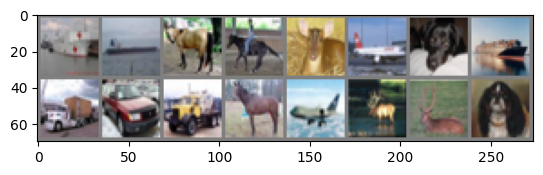

In [23]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
sample = iter(trainloader)
images, labels = next(sample)

# show some images
imshow(torchvision.utils.make_grid(images))

# print labels for the first row
print(' '.join('%4s' % classes[labels[j]] for j in range(8)))

Similar to the example above, complete the function below to create a "testloader"

In [24]:
def question_4_2(transform: transforms.Compose, batch_size:int, shuffle:bool, drop_last:bool) -> DataLoader:
    """
    Similar to the example above, create then return a DataLoader for testset
    """
    # Write your code in this block -----------------------------------------------------------
    ## Step 1: create `testset` using datasets.CIFAR10: similar to `trainset` above, with
    # download=True, transform=transform but set `train` to False
    testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    ## Step 2: create `testloader` using DataLoader and passing params `batch_size`, `shuffer`, `drop_last`
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=shuffle, num_workers=2, drop_last=drop_last)
    ## Step 3: return `testloader`
    return testloader
    # End of your code -----------------------------------------------------------


shuffle = False
drop_last = True
testloader = question_4_2(transform,  batch_size, shuffle, drop_last)
testloader

# **Question 5.** Training Models in Pytorch (*25 total points*)


 In this problem, we build a 2-layer MLP to predict the class for the images.

If you're using Colab, you can use its GPU to speed up the training. To opt to GPU, go to tab [Runtime -> Change Runtime type](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps4/gpu.png) -> Choose GPU for Hardware accelerator.


## **5.1 Code:** 2-layer MLP *(5 pts)*
Make a subclass of the `Module` class, called `MyMLP`.
You will need to define the `__init__` and `forward` methods. Our neuron would have 2 linear layers and 1 ReLU layer.

You can refer to the [Neural Networks tutorial of Pytorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html).


In [25]:
import torch.nn as nn

class MyMLP(nn.Module):
    def __init__(self, in_dim: int, hid_dim: int, out_dim: int):
        """
          in_dim: input dimension, usually we flatten 3d images  (num_channels, width, height) to 1d (num_channels * width * height),
                so we have in_dim = num_channels * width * height
          hid_dim: hidden dimension
          out_dim: output dimension
        """
        super().__init__()

        ## Complete the code below to initilaize self.linear_1, self.linear_2, self.relu
        # where self.linear_1 and self.linear_2 are `nn.Linear` objects, shape of (in_dim, hid_dim) and (hid_dim, out_dim) respectively,
        # and self.relu is a `nn.ReLU` object.
        # Write your code in this block -----------------------------------------------------------
        self.linear_1 = nn.Linear(in_dim, hid_dim)
        self.linear_2 = nn.Linear(hid_dim, out_dim)
        self.relu = nn.ReLU()


        # End of your code ------------------------------------------------------------------------

    def forward(self, x: Tensor) -> Tensor:
        ## Assume we want to build a model as following: input `x` -> linear_1 -> relu -> linear_2
        ## Write your forward pass
        # Write your code in this block -----------------------------------------------------------
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.linear_2(x)
        return x
        # End of your code ------------------------------------------------------------------------


## **5.2 Code:** Train 1 epoch *(5 pts)*


For each batch in the training set, we use 5 steps to train a Pytorch model
You will need to fill in the steps below.

In [28]:

def question_5_2_train_one_epoch(model: nn.Module, trainloader: DataLoader, device:torch.device,
                                 optimizer: torch.optim.SGD, criterion: torch.nn.CrossEntropyLoss, batch_size: int, flatten: bool):
    """
      Train 1 epoch on trainloader. You need to fill in after "##### [YOUR CODE]"
    """

    ## Set model to "train" model
    model = model.train()

    ## Keep track of loss and accuracy
    train_loss = 0.0
    train_acc = 0.0

    ## Loop over all the batches
    for i, (images, labels) in tqdm(enumerate(trainloader, 1), total=len(trainloader), desc=f"training 1 epoch..."):
        # For each batch, we have:
        #     + `images`: `bath_size` images in training set
        #     + `labels`: labels of the images (`batch_size` labels)


        ## Reshape the input dimension if we use MLP: instead of 3d (num_channels, width, height),
        # we flatten it to 1d (num_channels * width * height)
        if flatten:
            images = images.reshape(batch_size, -1)

        ## Move images and labels to `device` (CPU or GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Write your code in this block -------------------------------------------------------------------------------------------
        ## We use 5 following steps to train a Pytorch model

        ##### [YOUR CODE] Step 1. Forward pass: pass the data forward, the model try its best to predict what the output should be
        # You need to get the output from the model, store in a new variable named `logits`
        logits = model(images)

        ##### [YOUR CODE] Step 2. Compare the output that the model gives us with the real labels
        ## You need to compute the loss, store in a new variable named `loss`
        loss = criterion(logits, labels)


        ##### [YOUR CODE] Step 3. Clear the gradient buffer
        optimizer.zero_grad()

        ##### [YOUR CODE] Step 4. Backward pass: calculate partial derivatives of the loss w.r.t parameters
        loss.backward()

        ##### [YOUR CODE] Step 5. Update the parameters by stepping in the opposite direction from the gradient
        optimizer.step()

        # End of your code --------------------------------------------------------------------------------------------------------
        ## Compute loss and accuracy for this batch
        train_loss += loss.detach().item()
        train_acc += question_5_3_compute_accuracy(logits, labels, batch_size)

    return train_loss/i, train_acc/i ## avg loss and acc over all batches


## **5.3 Code:**  Compute accuracy *(5 pts)*


In [27]:
## compute accuracy score in a batch
def question_5_3_compute_accuracy(logits: Tensor, labels: Tensor, batch_size: int) -> float:
    '''
      Obtain accuracy for a training batch
      logits: float Tensor, shape (batch_size, num_classes),  output from the model
      labels: Long Tensor, shape (batch_size, ), contains labels for the predictions
      batch_size: int, batch size

      Return accuracy for this batch, which should be a float number in [0, 100], NOT a Tensor
    '''

    # Write your code in this block ----------------
    _, predicted = torch.max(logits, 1)
    correct_count = (predicted == labels).sum().item()
    accuracy = (correct_count / batch_size) * 100
    return accuracy

    # End of your code ---------------------------


## **5.4 Code:**  evaluate *(5 pts)*
We will write a function to evaluate our model on test set after each epoch

In [48]:
## Note that we use `torch.no_grad()` here to disable gradient calculation.
# It will reduce memory consumption as we don't need to compute gradients in inference.

@torch.no_grad()
def question_5_4_evaluate(model: nn.Module, testloader: DataLoader, criterion, batch_size, device, flatten: bool):
    """
    You need to fill in after "##### [YOUR CODE]"
    """

    test_acc = 0.0
    test_loss = 0.0

    ## Turn on the evaluation mode
    model.eval()

    ## Loop through each batch on test set
    for i, (images, labels) in enumerate(testloader, 1):

        ## Flatten the image into 1d if using MLP
        if flatten:
            images = images.reshape(batch_size, -1)

        # Write your code in this block -----------------------------------------------------------

        ##### [YOUR CODE] Move data to `device`
        images = images.to(device)
        labels = labels.to(device)

        ##### [YOUR CODE] forward pass to get the output of the model
        logits = model(images)

        ##### [YOUR CODE] Compute the loss
        test_loss += criterion(logits, labels)

        #### [YOUR CODE]  Compute accuracy (re-use question 5.3)
        test_acc += question_5_3_compute_accuracy(logits, labels, batch_size)

        # End of your code ---------------------------------------------------------------------------

    return test_loss/i, test_acc/i ## avg loss and acc over all batches


## **5.5 Code:**  Train model *(5 pts)*

Let's put everything together. Now we're ready to train a neural network!

In [49]:
import torch.optim as optim
from time import time
from collections import defaultdict

def question_5_5_train_model(model, device, num_epochs, batch_size, trainloader, testloader, flatten: bool = False):
    """
    model: Our neural net
    device: CPU/GPU
    num_epochs: How many epochs to train
    batch_size: batch size
    train/test loaders: training/test data
    flatten: whether we want to flatten the input image from 3d to 1d

    You need to fill in after "##### [YOUR CODE]"
    """

    # Write your code in this block -------------------------------------------------------------------------------------------

    ##### [YOUR CODE] create your optimizer using `optim.SGD`, set learning rate to 0.001, and momentum to 0.9
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    ##### [YOUR CODE] create criterion using `nn.CrossEntropyLoss`
    criterion = nn.CrossEntropyLoss()

    ## Measure runtime
    t_start = time()

    ## Store training log
    history = defaultdict(list)

    # We will train the model `num_epochs` times
    for i in range(1, num_epochs+1):
        ###### [YOUR CODE] train 1 epoch: call the function in question 5.2
        train_loss, train_acc = question_5_2_train_one_epoch(model, trainloader, device, optimizer, criterion, batch_size, flatten)


        ###### [YOUR CODE] call function in question 5.4 to see how it performs on test set
        test_loss, test_acc = question_5_4_evaluate(model, testloader, criterion, batch_size, device, flatten)

        # End of your code ----------------------------------------------------------------------------------------------------


        ## store train/test loss, accuracy
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)

        ## print out train/test loss, accuracy
        print(f'Epoch: {i} | Runtime: {((time()-t_start)/60):.2f}[m] | train_loss: {train_loss:.3f} | train_acc: {train_acc:.3f} | test_loss: {test_loss:.3f} | test_acc: {test_acc:.3f}')
    return history

Let's check again on the shape of each batch


In [50]:
images.shape ## (batch size, num channels, width, height)

torch.Size([16, 3, 32, 32])

In [51]:
## Let's create our MLP
in_dim, hid_dim, out_dim = 3*32*32, 256, 10

# set device: We will use GPU if it's available, otherwise CPU
# GPU is much faster to train neural nets
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 10

my_mlp = MyMLP(in_dim, hid_dim, out_dim)

## Move model to `device`: We need everthing (i.e., model, data) on the same device, either CPU, GPU or TPU.
my_mlp.to(device)

MyMLP(
  (linear_1): Linear(in_features=3072, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

Before training, let take a look at [`torchsummary`](https://pypi.org/project/torch-summary/). It provides a useful tool for a summary of the model.

In [52]:
from torchsummary import summary
summary(my_mlp, (in_dim, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         786,688
              ReLU-2                  [-1, 256]               0
            Linear-3                   [-1, 10]           2,570
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 3.01
Estimated Total Size (MB): 3.03
----------------------------------------------------------------


Our model has 786k trainable parameters.

Note that **"-1"** in *Output Shape* denotes batch size dimension, which is not a part of the model architecture.

In [53]:
## Train MLP model
flatten = True
history_mlp = question_5_5_train_model(my_mlp, device, num_epochs, batch_size, trainloader, testloader, flatten)

training 1 epoch...: 100%|██████████| 3125/3125 [00:17<00:00, 183.30it/s]


Epoch: 1 | Runtime: 0.57[m] | train_loss: 1.704 | train_acc: 40.166 | test_loss: 1.550 | test_acc: 46.040


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 192.95it/s]


Epoch: 2 | Runtime: 1.12[m] | train_loss: 1.498 | train_acc: 47.574 | test_loss: 1.457 | test_acc: 48.290


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 193.67it/s]


Epoch: 3 | Runtime: 1.67[m] | train_loss: 1.402 | train_acc: 51.208 | test_loss: 1.399 | test_acc: 51.180


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 192.38it/s]


Epoch: 4 | Runtime: 2.22[m] | train_loss: 1.332 | train_acc: 53.718 | test_loss: 1.377 | test_acc: 51.790


training 1 epoch...: 100%|██████████| 3125/3125 [00:15<00:00, 197.24it/s]


Epoch: 5 | Runtime: 2.77[m] | train_loss: 1.276 | train_acc: 55.812 | test_loss: 1.387 | test_acc: 51.150


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 189.78it/s]


Epoch: 6 | Runtime: 3.32[m] | train_loss: 1.227 | train_acc: 57.410 | test_loss: 1.370 | test_acc: 52.000


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 192.55it/s]


Epoch: 7 | Runtime: 3.87[m] | train_loss: 1.178 | train_acc: 59.046 | test_loss: 1.364 | test_acc: 52.680


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 192.24it/s]


Epoch: 8 | Runtime: 4.42[m] | train_loss: 1.141 | train_acc: 60.680 | test_loss: 1.341 | test_acc: 53.450


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 192.75it/s]


Epoch: 9 | Runtime: 4.96[m] | train_loss: 1.101 | train_acc: 61.688 | test_loss: 1.345 | test_acc: 53.540


training 1 epoch...: 100%|██████████| 3125/3125 [00:16<00:00, 193.27it/s]


Epoch: 10 | Runtime: 5.52[m] | train_loss: 1.065 | train_acc: 63.216 | test_loss: 1.373 | test_acc: 52.370


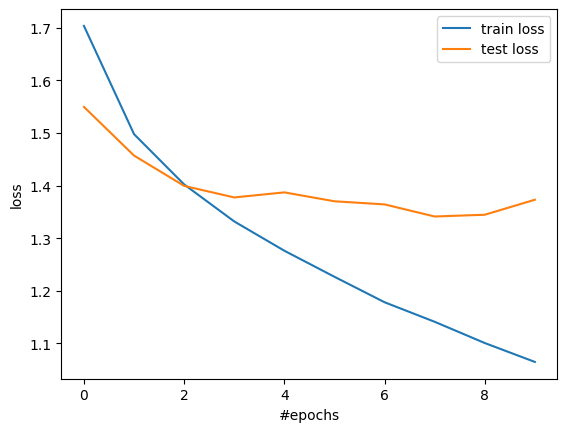

In [54]:
## Plot train_loss, test_loss
plt.plot(np.arange(num_epochs), history_mlp["train_loss"], label='train loss')
plt.plot(np.arange(num_epochs), history_mlp["test_loss"], label='test loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()

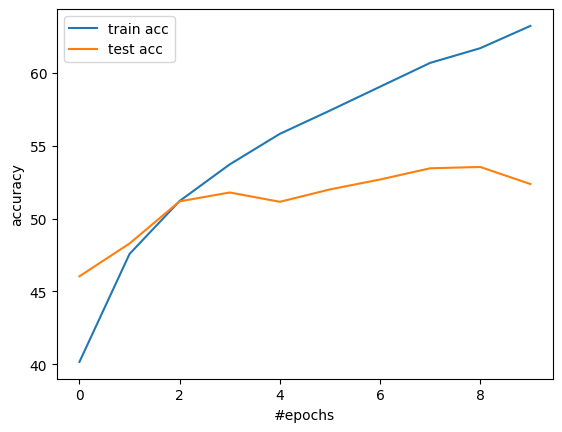

In [55]:
## Plot accuracy
plt.plot(np.arange(num_epochs), history_mlp["train_acc"], label='train acc')
plt.plot(np.arange(num_epochs), history_mlp["test_acc"], label='test acc')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()

# **Question 6.** CNN  (*15 total points*)
CNNs work well with datasets that have locality (data near each other will be more similar) and compositionality (the object consists of small parts). It has been using as a go-to method for images.

In this section, we will make a simple CNN model and train it on CIFAR10 dataset.

## **6.1 Code:**  CNN model *(10 pts)*

Now Let's build the 1 CNN model.

- In our CNN model, we have a convolutional layer denoted by `nn.Conv2d(...)`. We are dealing with an image dataset that is in RGB, so we need 3 channel going in, hence `in_channels=3`. We hope to get a nice representation of this layer, so we use `out_channels=32`. Kernel size is 5, and for the rest of parameters we use the default values which you can find [here](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).

- After each one of CONV or Linear Layers, we also apply an activation function such as `ReLU`.

Denote: **block_i = (conv_i -> relu -> pool)**

Let's say we want to build a CNN model as follows:  **input x -> block_1 -> block_2 -> flatten -> fc1 -> relu -> fc2 -> relu -> fc3**  (where fc is linear layer, you can refer to the model summary below)

You need to complete \_\_init__() (fill in ##### [YOUR CODE])   and forward() of `MyCNN`.

In [58]:
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        ## Recall that input images are 3x32x32,
        # i.e., 3 channels (red, green, blue), each of size 32x32 pixels.


        ## An example of conv and pooling layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(5, 5), stride=1, padding=0)
        # The first convolutional layer, `conv1`, expects 3 input channels,
        # and will convolve 32 filters each of size 3x5x5.
        # Since padding is set to 0 and stride is set to 1 as default,
        # the output size is (32, 28, 28).
        # This layer has ((3*5*5)+1)*32 = 2,432 parameters


        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)
        ## The first down-sampling layer uses max pooling with a (2,2) kernel
        # and a stride of 2. This effectively drops half of spatial size.

        self.conv2 = nn.Conv2d(32, 16, kernel_size=(5, 5), stride=1, padding=0)
        ## Similarly, we make another conv layer


        # Write your code in this block --------------------------------------------------------------

        self.fc1 = nn.Linear(16*5*5, 64)
        ## fc1 is a Linear layer. You'll need to look at the output of conv2 and the input of fc2 to
        # determine the in_dim and out_dim for fc1. You can do this by printing out the shape of the output of conv2 in forward() function.
        # End of your code ---------------------------------------------------------------------------


        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):

        # Implement your forward pass
        # Write your code in this block --------------------------------------------------------------
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)


        # End of your code ---------------------------------------------------------------------------

        return x

In [59]:
my_cnn = MyCNN().to(device)
summary(my_cnn, images.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           2,432
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]          12,816
              ReLU-5           [-1, 16, 10, 10]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                   [-1, 64]          25,664
              ReLU-8                   [-1, 64]               0
            Linear-9                   [-1, 32]           2,080
             ReLU-10                   [-1, 32]               0
           Linear-11                   [-1, 10]             330
Total params: 43,322
Trainable params: 43,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [60]:
## Train CNN
history_cnn = question_5_5_train_model(my_cnn, device, num_epochs, batch_size, trainloader, testloader)

training 1 epoch...: 100%|██████████| 3125/3125 [00:38<00:00, 80.45it/s] 


Epoch: 1 | Runtime: 0.97[m] | train_loss: 2.042 | train_acc: 23.632 | test_loss: 1.659 | test_acc: 38.400


training 1 epoch...: 100%|██████████| 3125/3125 [00:38<00:00, 80.76it/s] 


Epoch: 2 | Runtime: 1.92[m] | train_loss: 1.506 | train_acc: 44.502 | test_loss: 1.399 | test_acc: 48.620


training 1 epoch...: 100%|██████████| 3125/3125 [00:37<00:00, 82.86it/s] 


Epoch: 3 | Runtime: 2.86[m] | train_loss: 1.330 | train_acc: 51.542 | test_loss: 1.331 | test_acc: 52.210


training 1 epoch...: 100%|██████████| 3125/3125 [00:37<00:00, 84.30it/s] 


Epoch: 4 | Runtime: 3.79[m] | train_loss: 1.210 | train_acc: 56.324 | test_loss: 1.152 | test_acc: 58.990


training 1 epoch...: 100%|██████████| 3125/3125 [00:38<00:00, 82.18it/s] 


Epoch: 5 | Runtime: 4.73[m] | train_loss: 1.109 | train_acc: 60.612 | test_loss: 1.119 | test_acc: 61.050


training 1 epoch...: 100%|██████████| 3125/3125 [00:38<00:00, 81.33it/s] 


Epoch: 6 | Runtime: 5.69[m] | train_loss: 1.036 | train_acc: 63.394 | test_loss: 1.057 | test_acc: 63.200


training 1 epoch...: 100%|██████████| 3125/3125 [00:37<00:00, 83.45it/s] 


Epoch: 7 | Runtime: 6.64[m] | train_loss: 0.980 | train_acc: 65.370 | test_loss: 1.018 | test_acc: 63.490


training 1 epoch...: 100%|██████████| 3125/3125 [00:37<00:00, 84.26it/s] 


Epoch: 8 | Runtime: 7.57[m] | train_loss: 0.933 | train_acc: 67.256 | test_loss: 0.960 | test_acc: 66.370


training 1 epoch...: 100%|██████████| 3125/3125 [00:36<00:00, 84.51it/s] 


Epoch: 9 | Runtime: 8.50[m] | train_loss: 0.894 | train_acc: 68.534 | test_loss: 0.991 | test_acc: 64.870


training 1 epoch...: 100%|██████████| 3125/3125 [00:36<00:00, 84.65it/s] 


Epoch: 10 | Runtime: 9.42[m] | train_loss: 0.853 | train_acc: 70.192 | test_loss: 0.962 | test_acc: 66.590


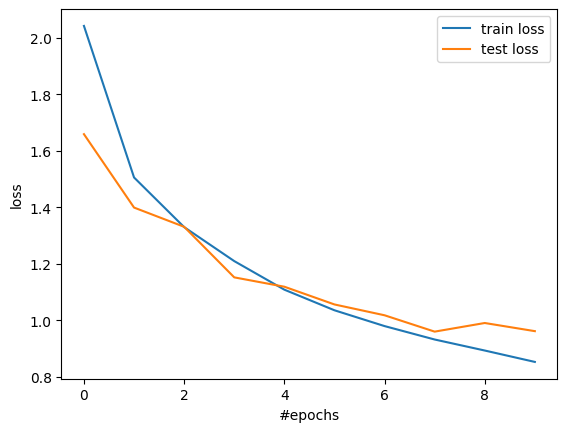

In [61]:
## Plot train_loss, test_loss of CNN model
plt.plot(np.arange(num_epochs), history_cnn["train_loss"], label='train loss')
plt.plot(np.arange(num_epochs), history_cnn["test_loss"], label='test loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()

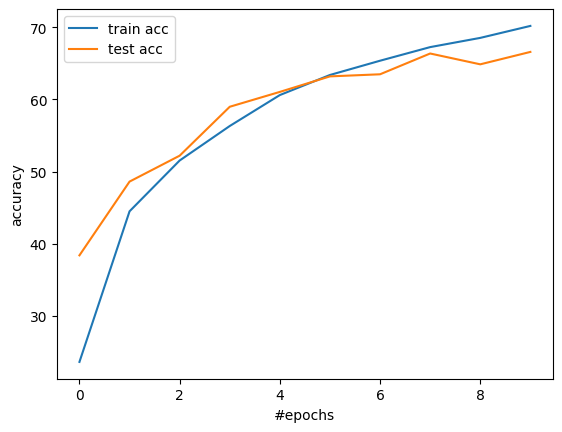

In [62]:
## Plot accuracy

plt.plot(np.arange(num_epochs), history_cnn["train_acc"], label='train acc')
plt.plot(np.arange(num_epochs), history_cnn["test_acc"], label='test acc')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()

## **6.2.1 Short answer:** MLP vs. CNN *(2.5 pts)*

Compare to the results of MLP and CNN, which model learns better on image dataset - MLP or CNN? Explain your answer.

Hint: You can discuss on accuracy, runtime, number of parameters, etc.

Write your answer in this block

**Answer:**
The CNN model learns better on image datasets compared to the MLP model. This is because CNNs are specifically designed to capture spatial hierarchies in images, allowing them to learn local patterns and features more effectively. The MLP model, treats each pixel independently, which can lead to a loss of spatial information. 
CNNs achieve higher test accuracy (66.59) than MLP (52.37). Additionally, CNNs have fewer parameters than MLPs for the same task, making them more efficient in terms of computation and memory usage.

## **6.2.2 Short answer:** You are given a MLP model. Briefly descrive in 5 steps as to how you can convert a MLP into a CNN model.  *(2.5 pts)*


Write your answer in this block

**Answer:**
1. Reshape the input from a flat vector to an image tensor
2. Replace first Linear layers with Conv2d layers
3. Add activation functions (e.g., ReLU) after each Conv2d layer
4. Add pooling layers (e.g., MaxPool2d) after each Conv2d layer
5. Flatten the output of the last pooling layer before passing it to the final Linear layers


## **6.3  (Bonus) CNN Architecture**. (10 points - Manual grading)

We have built a simple CNN model, and it works quite well on the dataset.
Assume we fix the number of epochs (10), optimizer and the loss function, can we improve the CNN architecture to gain more accuracy?

**One very impactful and simple concept is using residuals:**
https://arxiv.org/pdf/1512.03385.pdf

The idea is simple: When stacking multiple layers, we sometimes add in the outputs from a few layers before to the output of a certain layer.



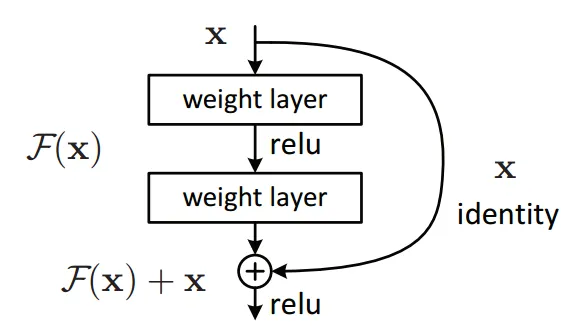

In [68]:
import requests
from IPython.display import Image, display

display(Image(requests.get("https://miro.medium.com/v2/resize:fit:640/format:webp/1*D0F3UitQ2l5Q0Ak-tjEdJg.png").content))

### **5 points:** Let's implement a 3-layer CNN with a residual connection.
The CNN should have 3 conv layers : conv1, conv2, conv3 and be implemented similar to MyCNN in 5.1. Now, add a residual connection from the output of the first conv1 layer to the output of the conv3 layer.

Hint 1: The output of the Conv1 has 32 channels - it might be benefecial to change that to 16 in this case so that it can be easily added to the output of the conv3 - which also has 16 channels. Even after this, the output shape of conv1

Hint 2: Note that the convoulution layers reduce the height and width of the input. Hence, the output of the conv3 layer will be smaller (and hence different) from conv_1. We won't be able to add them together with different shapes. Hence, one trick is padding - padding the images with 0's at every input to keep the output dimensions of the convolution layer the same as the input image wihtout the padding. You can do in Pytorch by passing the argument `padding="same"` in the conv2d init.

training 1 epoch...: 100%|██████████| 3125/3125 [01:04<00:00, 48.37it/s]


Epoch: 1 | Runtime: 1.42[m] | train_loss: 1.657 | train_acc: 41.090 | test_loss: 1.405 | test_acc: 49.700


training 1 epoch...: 100%|██████████| 3125/3125 [01:04<00:00, 48.29it/s]


Epoch: 2 | Runtime: 2.84[m] | train_loss: 1.294 | train_acc: 53.796 | test_loss: 1.240 | test_acc: 56.110


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.59it/s]


Epoch: 3 | Runtime: 4.20[m] | train_loss: 1.134 | train_acc: 59.832 | test_loss: 1.129 | test_acc: 59.590


training 1 epoch...: 100%|██████████| 3125/3125 [01:02<00:00, 50.34it/s]


Epoch: 4 | Runtime: 5.55[m] | train_loss: 1.011 | train_acc: 64.174 | test_loss: 1.062 | test_acc: 62.790


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.80it/s]


Epoch: 5 | Runtime: 6.91[m] | train_loss: 0.905 | train_acc: 68.124 | test_loss: 0.998 | test_acc: 64.980


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 51.11it/s]


Epoch: 6 | Runtime: 8.25[m] | train_loss: 0.824 | train_acc: 71.008 | test_loss: 1.036 | test_acc: 63.880


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.63it/s]


Epoch: 7 | Runtime: 9.60[m] | train_loss: 0.753 | train_acc: 73.534 | test_loss: 0.974 | test_acc: 66.110


training 1 epoch...: 100%|██████████| 3125/3125 [01:03<00:00, 49.17it/s]


Epoch: 8 | Runtime: 10.99[m] | train_loss: 0.689 | train_acc: 75.718 | test_loss: 0.993 | test_acc: 66.170


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.93it/s]


Epoch: 9 | Runtime: 12.34[m] | train_loss: 0.629 | train_acc: 77.856 | test_loss: 1.018 | test_acc: 66.340


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.82it/s]


Epoch: 10 | Runtime: 13.69[m] | train_loss: 0.569 | train_acc: 80.022 | test_loss: 1.056 | test_acc: 66.200


training 1 epoch...: 100%|██████████| 3125/3125 [02:12<00:00, 23.51it/s]


Epoch: 1 | Runtime: 2.63[m] | train_loss: 1.476 | train_acc: 46.200 | test_loss: 1.134 | test_acc: 59.460


training 1 epoch...: 100%|██████████| 3125/3125 [02:08<00:00, 24.35it/s]


Epoch: 2 | Runtime: 5.18[m] | train_loss: 1.138 | train_acc: 59.344 | test_loss: 0.952 | test_acc: 66.230


training 1 epoch...: 100%|██████████| 3125/3125 [02:06<00:00, 24.79it/s]


Epoch: 3 | Runtime: 7.68[m] | train_loss: 0.990 | train_acc: 65.154 | test_loss: 0.860 | test_acc: 70.090


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.89it/s]


Epoch: 4 | Runtime: 10.18[m] | train_loss: 0.911 | train_acc: 68.004 | test_loss: 0.787 | test_acc: 72.580


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.95it/s]


Epoch: 5 | Runtime: 12.68[m] | train_loss: 0.851 | train_acc: 70.224 | test_loss: 0.764 | test_acc: 73.590


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.88it/s]


Epoch: 6 | Runtime: 15.18[m] | train_loss: 0.792 | train_acc: 72.400 | test_loss: 0.757 | test_acc: 74.070


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.87it/s]


Epoch: 7 | Runtime: 17.68[m] | train_loss: 0.753 | train_acc: 73.362 | test_loss: 0.725 | test_acc: 75.100


training 1 epoch...: 100%|██████████| 3125/3125 [02:06<00:00, 24.77it/s]


Epoch: 8 | Runtime: 20.19[m] | train_loss: 0.713 | train_acc: 74.918 | test_loss: 0.726 | test_acc: 74.370


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.88it/s]


Epoch: 9 | Runtime: 22.69[m] | train_loss: 0.680 | train_acc: 76.256 | test_loss: 0.685 | test_acc: 76.510


training 1 epoch...: 100%|██████████| 3125/3125 [02:05<00:00, 24.84it/s]


Epoch: 10 | Runtime: 25.20[m] | train_loss: 0.651 | train_acc: 77.254 | test_loss: 0.666 | test_acc: 77.260


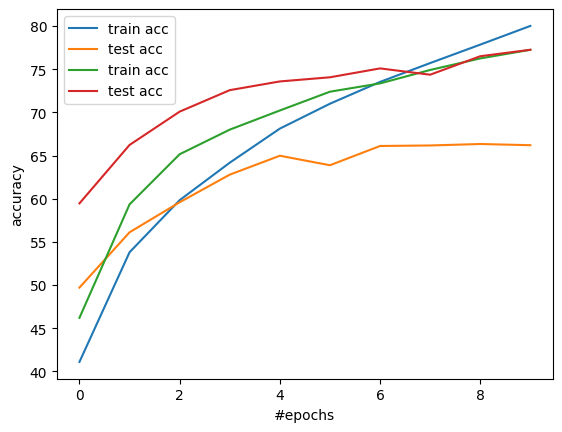

In [79]:
class ResidualCNN(nn.Module):
    """
      Feel free to experiment on CNN model.
      You only need to report the model that has the best performance on the dataset.
    """

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding='same')

        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding='same')

        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding='same')

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)

        self.relu = nn.ReLU()


    def forward(self, x):
        out1 = self.relu(self.conv1(x))      
        out2 = self.relu(self.conv2(out1))   
        out3 = self.relu(self.conv3(out2))   

        # Residual connection
        out = out1 + out3

        out = self.pool(out) 

        out = out.view(out.size(0), -1) 
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

class MyBestCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding="same")
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding="same")
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding="same")
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding="same")
        self.bn4 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        residual = out  
        out = F.relu(self.bn2(self.conv2(out)))
        out = out + residual  

        out = self.pool(out)
        out = self.dropout(out)

        out = F.relu(self.bn3(self.conv3(out)))
        residual = out  
        out = F.relu(self.bn4(self.conv4(out)))
        out = out + residual  

        out = self.pool(out)
        out = self.dropout(out)

        out = out.view(out.size(0), -1)  
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

## You need to:
#   + Fill in the `MyBestCNN` class, use the best model you have
#   + Show the training log (train/test loss and accuracy) of the best model (you should use `question_5_5_train_model()` as the code below)
#   + Discuss about your experiment

### Initialize your model
# cnn_res = ResidualCNN()

#### Show the training log.
# history_res_cnn = question_5_5_train_model(cnn_res, device, num_epochs, batch_size, trainloader, testloader)
# # Plot accuracy
# plt.plot(np.arange(num_epochs), history_res_cnn["train_acc"], label='train acc')
# plt.plot(np.arange(num_epochs), history_res_cnn["test_acc"], label='test acc')
# plt.xlabel('#epochs')
# plt.ylabel('accuracy')
# plt.legend()

# cnn_best = MyBestCNN()
# history_best_cnn = question_5_5_train_model(cnn_best, device, num_epochs, batch_size, trainloader, testloader)
# # Plot accuracy
# plt.plot(np.arange(num_epochs), history_best_cnn["train_acc"], label='train acc')
# plt.plot(np.arange(num_epochs), history_best_cnn["test_acc"], label='test acc')
# plt.xlabel('#epochs')
# plt.ylabel('accuracy')
# plt.legend()

### **5 points:** Short Answer: Compare to network without the residual connections

Make the same network below and remove the residual connection. Compare the performance.

Feel free to change the number of layers of the CNN. Does the residual connection help more with more layers? What about changing the number of residual connections?

This is an open-ended exploratory answer.

training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.86it/s]


Epoch: 1 | Runtime: 1.36[m] | train_loss: 1.860 | train_acc: 33.110 | test_loss: 1.576 | test_acc: 43.730


training 1 epoch...: 100%|██████████| 3125/3125 [01:03<00:00, 48.99it/s]


Epoch: 2 | Runtime: 2.76[m] | train_loss: 1.474 | train_acc: 46.864 | test_loss: 1.385 | test_acc: 50.100


training 1 epoch...: 100%|██████████| 3125/3125 [01:02<00:00, 49.68it/s]


Epoch: 3 | Runtime: 4.13[m] | train_loss: 1.313 | train_acc: 52.862 | test_loss: 1.285 | test_acc: 54.120


training 1 epoch...: 100%|██████████| 3125/3125 [01:02<00:00, 50.22it/s]


Epoch: 4 | Runtime: 5.49[m] | train_loss: 1.168 | train_acc: 58.248 | test_loss: 1.157 | test_acc: 58.970


training 1 epoch...: 100%|██████████| 3125/3125 [01:01<00:00, 50.75it/s]


Epoch: 5 | Runtime: 6.85[m] | train_loss: 1.027 | train_acc: 63.680 | test_loss: 1.075 | test_acc: 62.470


training 1 epoch...: 100%|██████████| 3125/3125 [01:02<00:00, 49.83it/s]


Epoch: 6 | Runtime: 8.22[m] | train_loss: 0.911 | train_acc: 67.804 | test_loss: 1.037 | test_acc: 63.560


training 1 epoch...: 100%|██████████| 3125/3125 [01:05<00:00, 47.41it/s]


Epoch: 7 | Runtime: 9.65[m] | train_loss: 0.811 | train_acc: 71.382 | test_loss: 0.996 | test_acc: 65.630


training 1 epoch...: 100%|██████████| 3125/3125 [01:04<00:00, 48.32it/s]


Epoch: 8 | Runtime: 11.06[m] | train_loss: 0.718 | train_acc: 74.676 | test_loss: 0.994 | test_acc: 66.390


training 1 epoch...: 100%|██████████| 3125/3125 [01:00<00:00, 51.62it/s]


Epoch: 9 | Runtime: 12.39[m] | train_loss: 0.633 | train_acc: 77.752 | test_loss: 1.045 | test_acc: 65.570


training 1 epoch...: 100%|██████████| 3125/3125 [01:02<00:00, 50.24it/s]


Epoch: 10 | Runtime: 13.76[m] | train_loss: 0.557 | train_acc: 80.336 | test_loss: 1.100 | test_acc: 65.190


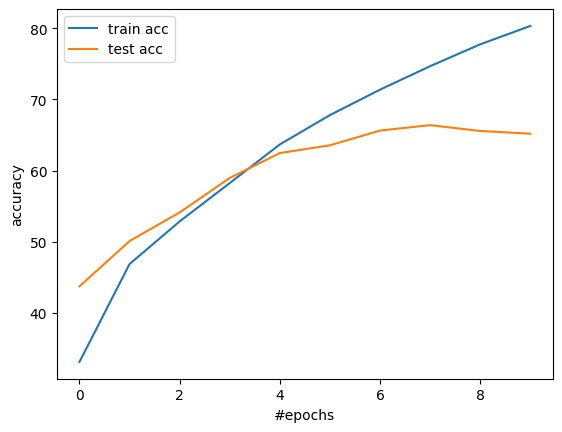

In [76]:
class NoResCNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding='same')

        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding='same')

        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding='same')

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)

        self.relu = nn.ReLU()


    def forward(self, x):
        out1 = self.relu(self.conv1(x))      
        out2 = self.relu(self.conv2(out1))   
        out3 = self.relu(self.conv3(out2))   

        out = self.pool(out3) 

        out = out.view(out.size(0), -1) 
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

cnn_no_res = NoResCNN()

#### Show the training log.
# history_no_res_cnn = question_5_5_train_model(cnn_no_res, device, num_epochs, batch_size, trainloader, testloader)
## Plot accuracy
# plt.plot(np.arange(num_epochs), history_no_res_cnn["train_acc"], label='train acc')
# plt.plot(np.arange(num_epochs), history_no_res_cnn["test_acc"], label='test acc')
# plt.xlabel('#epochs')
# plt.ylabel('accuracy')
# plt.legend()

**Your discussion**

ResCNN vs CNN: The train accuracy of ResCNN is higher than CNN. The test accuracy of ResCNN is slightly higher than CNN. The improvement of test acc is not significant, but it is still a positive outcome. I believe that the residual connection helps the model learn better by allowing gradients to flow more easily through the network during backpropagation. And with residual connection, the model is able to reuse features learned in earlier layers, which can be beneficial for deep networks. The reason why the improvement is not significant could be due to the fact that the model is already quite simple and has a small number of layers. 

MyBestCNN: I improve the model by adding more layers and increasing the number of filters in each layer. Batch normalization is added after each convolution to accelerate convergence and stabilize learning. Dropout layers are included after pooling to reduce overfitting and that is why the testing accuracy is higher than training accuracy in some iterations. Generally, the more layers and filters we add, the better the model performs. 

**Congrats! You have reached to the end of Pset4**